In [106]:
## 공유된 코드(실행 확인)

import pandas as pd

# GCS 파일 경로
gcs_path = "gs://codeit-project/votes/accounts_timelinereport.parquet"
# 예시: gs://codeit-project/hackle/hackle_events.parquet

# GCP 키 경로
key_path = "config/key.json"

# 데이터 불러오기
df = pd.read_parquet(gcs_path, storage_options={"token": key_path})

# 확인
df.head()



,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


# Votes 데이터 가져오기

---

## 간단한 EDA 및 데이터 한번에 가져오는 방법 모색

In [107]:
# 필요 라이브러리 정리 
import pandas as pd

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [108]:
# 인증
key_path = "config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("codeit-project")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://codeit-project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")]

# 결과 확인
vote_file_list


['gs://codeit-project/votes/accounts_attendance.parquet',
 'gs://codeit-project/votes/accounts_blockrecord.parquet',
 'gs://codeit-project/votes/accounts_failpaymenthistory.parquet',
 'gs://codeit-project/votes/accounts_friendrequest.parquet',
 'gs://codeit-project/votes/accounts_group.parquet',
 'gs://codeit-project/votes/accounts_nearbyschool.parquet',
 'gs://codeit-project/votes/accounts_paymenthistory.parquet',
 'gs://codeit-project/votes/accounts_pointhistory.parquet',
 'gs://codeit-project/votes/accounts_school.parquet',
 'gs://codeit-project/votes/accounts_timelinereport.parquet',
 'gs://codeit-project/votes/accounts_user.parquet',
 'gs://codeit-project/votes/accounts_user_contacts.parquet',
 'gs://codeit-project/votes/accounts_userquestionrecord.parquet',
 'gs://codeit-project/votes/accounts_userwithdraw.parquet',
 'gs://codeit-project/votes/event_receipts.parquet',
 'gs://codeit-project/votes/events.parquet',
 'gs://codeit-project/votes/polls_question.parquet',
 'gs://codeit-p

In [109]:
for title in vote_file_list:
    # GCS 파일 경로
    gcs_path = title

    # GCP 키 경로
    key_path = "config/key.json"
    
    # 파일 이름 추출
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 확인
    print(f"{file_name}")

accounts_attendance
accounts_blockrecord
accounts_failpaymenthistory
accounts_friendrequest
accounts_group
accounts_nearbyschool
accounts_paymenthistory
accounts_pointhistory
accounts_school
accounts_timelinereport
accounts_user
accounts_user_contacts
accounts_userquestionrecord
accounts_userwithdraw
event_receipts
events
polls_question
polls_questionpiece
polls_questionreport
polls_questionset
polls_usercandidate


In [110]:
# 결과 저장용 딕셔너리
df_dict = {}

# GCP 키 경로
key_path = "config/key.json"

for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")


accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

In [111]:
# 예시로 특정 데이터 프레임 확인인

df_dict["polls_usercandidate"].head()

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


In [112]:
# 각 DataFrame의 메모리 사용량 계산 (MB 단위)
memory_info = {
    name: df.memory_usage(deep=True).sum() / (1024**2)  # MB 단위
    for name, df in df_dict.items()
}

# 크기 순으로 정렬
sorted_memory = sorted(memory_info.items(), key=lambda x: x[1], reverse=True)

# 출력
print("데이터프레임 메모리 사용량 (MB):")
for name, size in sorted_memory:
    print(f"{name:30s} : {size:.2f} MB")


데이터프레임 메모리 사용량 (MB):
accounts_friendrequest         : 1602.58 MB
accounts_user                  : 550.32 MB
accounts_userquestionrecord    : 227.59 MB
polls_usercandidate            : 145.56 MB
accounts_pointhistory          : 89.22 MB
accounts_attendance            : 54.05 MB
polls_questionpiece            : 48.27 MB
polls_questionset              : 37.53 MB
accounts_paymenthistory        : 13.45 MB
accounts_userwithdraw          : 7.66 MB
polls_questionreport           : 6.50 MB
accounts_group                 : 2.58 MB
accounts_blockrecord           : 2.45 MB
accounts_nearbyschool          : 1.82 MB
accounts_school                : 0.98 MB
polls_question                 : 0.65 MB
accounts_user_contacts         : 0.41 MB
accounts_timelinereport        : 0.03 MB
accounts_failpaymenthistory    : 0.02 MB
event_receipts                 : 0.01 MB
events                         : 0.00 MB


## 각 데이터 살펴보기(다른 테이블과 merge 하지 않고 확인)
데이터 크기가 작은 순서대로 진행

In [113]:
# ## 공통으로 진행할 내용

# def check_data_info(df):
    
#     # 각 데이터프레임에서 데이터 타입 확인
#     print("데이터 타입 확인")
#     print("="*50)
#     print(df.dtypes)
    
#     # 결측치 확인
#     print("결측치 확인")
#     print("="*50)
#     print(df.isnull().sum())
#     print("결측치 비율 확인")
#     print("="*50)
#     print(df.isnull().mean() * 100)
    
#     # id 컬럼이 있는 경우 id 컬럼 제외한 중복값 확인
#     if 'id' in df.columns:
#         print("id 컬럼 제외한 중복값 확인")
#         print("="*50)
#         print(df.drop(columns=['id']).duplicated().sum())
#         print("id 컬럼 제외한 중복값 비율 확인")
#         print("="*50)
#         print(df.drop(columns=['id']).duplicated().mean() * 100)
#     # id 컬럼이 없는 경우
#     else:
#         print("id 컬럼이 없습니다. 전체 중복값 확인")
#         print("="*50)
#         print(df.duplicated().sum())
#         print("전체 중복값 비율 확인")
#         print("="*50)
#         print(df.duplicated().mean() * 100)
    
#     # 데이터프레임 크기 확인
#     print("데이터프레임 크기 확인")
#     print("="*50)
#     print(df.shape)
#     print("데이터프레임 메모리 사용량 확인")
#     print("="*50)
#     print(df.memory_usage(deep=True).sum() / (1024**2), "MB")
    
#     # 데이터프레임의 기본 통계량 확인
#     print("기본 통계량 확인")
#     print("="*50)
#     print(df.describe(include='all'))
    
#     return df
    

In [114]:
# 공통으로 데이터 확인을 위한 함수 처리(좀 더 구체적으로 함수 제작)
def check_data_info(df, verbose=True):
    result = {}

    # 데이터 타입
    if verbose: print("데이터 타입 확인\n" + "="*50)
    result['dtypes'] = df.dtypes

    # 결측치 개수 및 비율
    null_count = df.isnull().sum()
    null_rate = df.isnull().mean() * 100

    result['null_count'] = null_count
    result['null_rate'] = null_rate

    if verbose and null_count.sum() > 0:
        print("결측치 확인\n" + "="*50)
        print(null_count[null_count > 0])  # 결측치 있는 컬럼만 출력
        print("결측치 비율 확인\n" + "="*50)
        print(null_rate[null_rate > 0])
    else:
        print("결측치가 없습니다.\n" + "="*50)

    # 중복 체크
    if 'id' in df.columns:
        dup_count = df.drop(columns=['id']).duplicated().sum()
        dup_rate = df.drop(columns=['id']).duplicated().mean() * 100
        result['duplicate_excl_id'] = {'count': dup_count, 'rate': dup_rate}
        if verbose and dup_count > 0:
            print("id 컬럼 제외한 중복값 확인\n" + "="*50)
            print(dup_count)
            print("비율\n" + "="*50)
            print(dup_rate)
        else:
            print("id 컬럼 제외한 중복값이 없습니다.\n" + "="*50)
            
    else:
        dup_count = df.duplicated().sum()
        dup_rate = df.duplicated().mean() * 100
        result['duplicate_all'] = {'count': dup_count, 'rate': dup_rate}
        if verbose and dup_count > 0:
            print("전체 중복값 확인\n" + "="*50)
            print(dup_count)
            print("비율\n" + "="*50)
            print(dup_rate)
        else:
            print("전체 중복값이 없습니다.\n" + "="*50)

    # 크기 및 메모리
    result['shape'] = df.shape
    result['memory_MB'] = df.memory_usage(deep=True).sum() / 1024**2
    if verbose:
        print("데이터프레임 크기 확인\n" + "="*50)
        print(result['shape'])
        print("메모리 사용량\n" + "="*50)
        print(f"{result['memory_MB']:.2f} MB")

    # 통계 요약
    result['describe'] = df.describe(include='all')
    if verbose:
        print("기본 통계량\n" + "="*50)
        print(result['describe'])

    return result

### events 
---

In [115]:
check_data_info(df_dict["events"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
데이터프레임 크기 확인
(3, 6)
메모리 사용량
0.00 MB
기본 통계량
         id          title   plus_point event_type  is_expired  \
count   3.0              3     3.000000          3         3.0   
unique  NaN              3          NaN          1         NaN   
top     NaN  코드잇 은행 가입 이벤트          NaN       FCFS         NaN   
freq    NaN              1          NaN          3         NaN   
mean    2.0            NaN   666.666667        NaN         1.0   
min     1.0            NaN   500.000000        NaN         1.0   
25%     1.5            NaN   500.000000        NaN         1.0   
50%     2.0            NaN   500.000000        NaN         1.0   
75%     2.5            NaN   750.000000        NaN         1.0   
max     3.0            NaN  1000.000000        NaN         1.0   
std     1.0            NaN   288.675135        NaN         0.0   

                           created_at  
count                               3  
unique                            NaN  
to

{'dtypes': id                     int64
 title                 object
 plus_point             int64
 event_type            object
 is_expired             int64
 created_at    datetime64[ns]
 dtype: object,
 'null_count': id            0
 title         0
 plus_point    0
 event_type    0
 is_expired    0
 created_at    0
 dtype: int64,
 'null_rate': id            0.0
 title         0.0
 plus_point    0.0
 event_type    0.0
 is_expired    0.0
 created_at    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (3, 6),
 'memory_MB': np.float64(0.0008029937744140625),
 'describe':          id          title   plus_point event_type  is_expired  \
 count   3.0              3     3.000000          3         3.0   
 unique  NaN              3          NaN          1         NaN   
 top     NaN  코드잇 은행 가입 이벤트          NaN       FCFS         NaN   
 freq    NaN              1          NaN          3         NaN   
 mean    2.0            NaN   666.

### events_receipts

---

In [116]:
check_data_info(df_dict["event_receipts"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
데이터프레임 크기 확인
(309, 5)
메모리 사용량
0.01 MB
기본 통계량
               id                     created_at    event_id       user_id  \
count  309.000000                            309  309.000000  3.090000e+02   
mean   160.964401  2023-07-24 01:53:59.954692608    1.249191  1.179715e+06   
min      2.000000            2023-06-22 09:25:16    1.000000  8.378360e+05   
25%     82.000000            2023-07-10 16:58:20    1.000000  9.998160e+05   
50%    161.000000            2023-07-20 12:24:28    1.000000  1.139491e+06   
75%    239.000000            2023-07-29 09:38:22    1.000000  1.325911e+06   
max    321.000000            2023-11-21 12:03:02    3.000000  1.579064e+06   
std     92.065029                            NaN    0.563536  2.171981e+05   

        plus_point  
count   309.000000  
mean    559.870550  
min     500.000000  
25%     500.000000  
50%     500.000000  
75%     500.000000  
max    1000.000000  
std     162.592579  


{'dtypes': id                     int64
 created_at    datetime64[ns]
 event_id               int64
 user_id                int64
 plus_point             int64
 dtype: object,
 'null_count': id            0
 created_at    0
 event_id      0
 user_id       0
 plus_point    0
 dtype: int64,
 'null_rate': id            0.0
 created_at    0.0
 event_id      0.0
 user_id       0.0
 plus_point    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (309, 5),
 'memory_MB': np.float64(0.011913299560546875),
 'describe':                id                     created_at    event_id       user_id  \
 count  309.000000                            309  309.000000  3.090000e+02   
 mean   160.964401  2023-07-24 01:53:59.954692608    1.249191  1.179715e+06   
 min      2.000000            2023-06-22 09:25:16    1.000000  8.378360e+05   
 25%     82.000000            2023-07-10 16:58:20    1.000000  9.998160e+05   
 50%    161.000000            2023-07-2

In [117]:
# event_id 별 크기
print(f"event_id 별 크기 : {df_dict['event_receipts'].groupby('event_id').size()}\n")

# 여러 event를 가진 user_id 확인
print(f"여러 이벤트를 경험한 유저 확인 : {df_dict['event_receipts'].groupby('user_id').size().sort_values(ascending=False)}\n")

# 특정 유저의 이벤트 확인
display(df_dict["event_receipts"][df_dict["event_receipts"].user_id == 1577954])

event_id 별 크기 : event_id
1    252
2     37
3     20
dtype: int64

여러 이벤트를 경험한 유저 확인 : user_id
1577954    2
1275883    1
1272917    1
1268928    1
1265520    1
          ..
1052779    1
1051784    1
1048166    1
1046007    1
1064125    1
Length: 308, dtype: int64



,id,created_at,event_id,user_id,plus_point
75,80,2023-07-10 16:51:17,1,1577954,500
76,81,2023-07-10 16:57:04,1,1577954,500


In [118]:
# 각 이벤트 별 유지 기간 확인
df_dict["event_receipts"].groupby("event_id").agg({
    "created_at": ["min", "max"],
    "user_id": "nunique"
}).rename(columns={
    "min": "start_time",
    "max": "end_time",
    "nunique": "unique_users"
}).reset_index()

event_id          created_at                          user_id
                    start_time            end_time unique_users
0        1 2023-06-22 09:25:16 2023-07-31 14:45:34          251
1        2 2023-08-08 15:19:56 2023-08-20 16:28:20           37
2        3 2023-09-27 06:17:44 2023-11-21 12:03:02           20

나중에 확인해볼 내용 메모
- 이벤트 생성 직후가 이벤트 신청한 사람이 많은지?
- 한 사람이 같은 이벤트를 가진 경우 발견 > 이상치? 제거할지?

### accounts_failpaymenthistory
---

In [119]:
check_data_info(df_dict["accounts_failpaymenthistory"])

데이터 타입 확인
결측치 확인
productId    107
dtype: int64
결측치 비율 확인
productId    65.644172
dtype: float64
id 컬럼 제외한 중복값 확인
1
비율
0.6134969325153374
데이터프레임 크기 확인
(163, 5)
메모리 사용량
0.02 MB
기본 통계량
                id  productId phone_type                     created_at  \
count   163.000000         56        163                            163   
unique         NaN          3          2                            NaN   
top            NaN  heart.777          I                            NaN   
freq           NaN         49        107                            NaN   
mean     89.828221        NaN        NaN  2023-05-27 11:32:20.828220672   
min       6.000000        NaN        NaN            2023-05-14 05:49:22   
25%      48.500000        NaN        NaN            2023-05-18 11:34:05   
50%      89.000000        NaN        NaN            2023-05-22 08:54:33   
75%     131.500000        NaN        NaN     2023-05-29 12:58:21.500000   
max     174.000000        NaN        NaN            2023-09-17 09:12:

{'dtypes': id                     int64
 productId             object
 phone_type            object
 created_at    datetime64[ns]
 user_id                int64
 dtype: object,
 'null_count': id              0
 productId     107
 phone_type      0
 created_at      0
 user_id         0
 dtype: int64,
 'null_rate': id             0.000000
 productId     65.644172
 phone_type     0.000000
 created_at     0.000000
 user_id        0.000000
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(1),
  'rate': np.float64(0.6134969325153374)},
 'shape': (163, 5),
 'memory_MB': np.float64(0.018850326538085938),
 'describe':                 id  productId phone_type                     created_at  \
 count   163.000000         56        163                            163   
 unique         NaN          3          2                            NaN   
 top            NaN  heart.777          I                            NaN   
 freq           NaN         49        107                            NaN 

In [120]:
# id 컬럼 제외한 중복값이 존재하므로 제거 
df_dict["accounts_failpaymenthistory"] = df_dict["accounts_failpaymenthistory"].drop_duplicates(subset=df_dict["accounts_failpaymenthistory"].columns.difference(['id']))
check_data_info(df_dict["accounts_failpaymenthistory"])

데이터 타입 확인
결측치 확인
productId    106
dtype: int64
결측치 비율 확인
productId    65.432099
dtype: float64
id 컬럼 제외한 중복값이 없습니다.
데이터프레임 크기 확인
(162, 5)
메모리 사용량
0.02 MB
기본 통계량
                id  productId phone_type                     created_at  \
count   162.000000         56        162                            162   
unique         NaN          3          2                            NaN   
top            NaN  heart.777          I                            NaN   
freq           NaN         49        106                            NaN   
mean     89.308642        NaN        NaN  2023-05-26 18:48:45.814814720   
min       6.000000        NaN        NaN            2023-05-14 05:49:22   
25%      48.250000        NaN        NaN            2023-05-18 11:09:50   
50%      88.500000        NaN        NaN     2023-05-22 08:39:49.500000   
75%     130.750000        NaN        NaN  2023-05-29 09:50:39.249999872   
max     173.000000        NaN        NaN            2023-09-17 09:12:53   
std      48.18

{'dtypes': id                     int64
 productId             object
 phone_type            object
 created_at    datetime64[ns]
 user_id                int64
 dtype: object,
 'null_count': id              0
 productId     106
 phone_type      0
 created_at      0
 user_id         0
 dtype: int64,
 'null_rate': id             0.000000
 productId     65.432099
 phone_type     0.000000
 created_at     0.000000
 user_id        0.000000
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (162, 5),
 'memory_MB': np.float64(0.01985931396484375),
 'describe':                 id  productId phone_type                     created_at  \
 count   162.000000         56        162                            162   
 unique         NaN          3          2                            NaN   
 top            NaN  heart.777          I                            NaN   
 freq           NaN         49        106                            NaN   
 mean     89.30

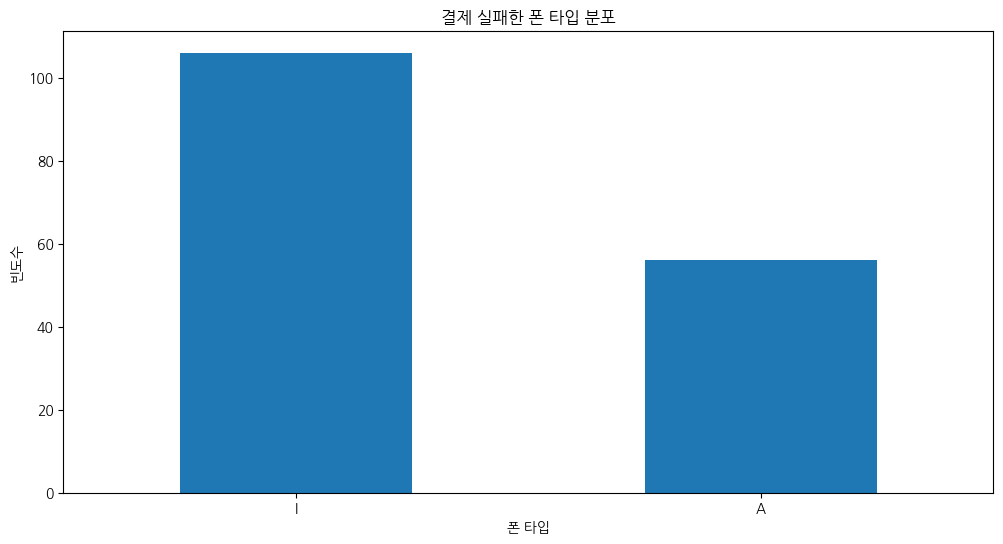

In [127]:
# 결제 실패한 폰type 시각화

df_dict["accounts_failpaymenthistory"].phone_type.value_counts()
plt.figure(figsize=(12, 6))
df_dict["accounts_failpaymenthistory"].phone_type.value_counts().plot(kind='bar')
plt.title("결제 실패한 폰 타입 분포")
plt.xlabel("폰 타입")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.show()

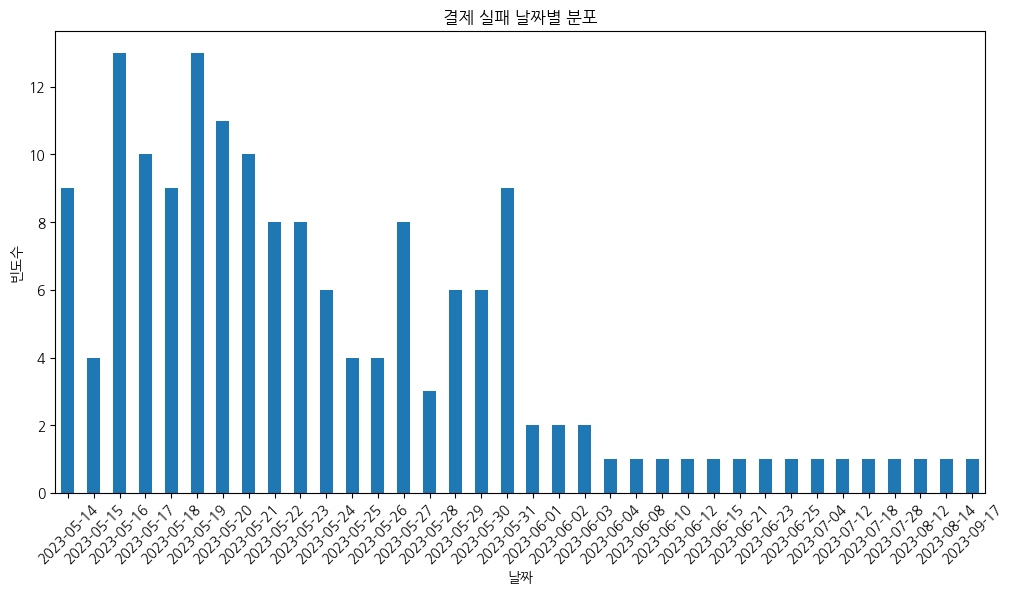

In [122]:
# date별로 언제 오류가 많이 생겼나?(서버의 오류가 있었나 확인)

df_dict["accounts_failpaymenthistory"].created_at.dt.date.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title("결제 실패 날짜별 분포")
plt.xlabel("날짜")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()

추가로 확인할 내용
- 어느 시점에서 실패가 많은건지 

### accounts_timelinereport
---

In [123]:
check_data_info(df_dict["accounts_timelinereport"])

데이터 타입 확인
결측치가 없습니다.
id 컬럼 제외한 중복값이 없습니다.
데이터프레임 크기 확인
(208, 6)
메모리 사용량
0.04 MB
기본 통계량
                  id    reason                     created_at  \
count     208.000000       208                            208   
unique           NaN         5                            NaN   
top              NaN  허위 사실 언급                            NaN   
freq             NaN        80                            NaN   
mean     9786.269231       NaN  2023-05-15 08:13:50.278846208   
min        28.000000       NaN            2023-05-06 04:44:57   
25%      6123.750000       NaN     2023-05-11 16:41:43.500000   
50%     10095.000000       NaN            2023-05-15 01:23:29   
75%     14182.250000       NaN            2023-05-18 18:01:18   
max     23108.000000       NaN            2023-06-02 08:30:06   
std      5713.767759       NaN                            NaN   

        reported_user_id       user_id  user_question_record_id  
count       2.080000e+02  2.080000e+02             2.080000e+02  


{'dtypes': id                                  int64
 reason                             object
 created_at                 datetime64[ns]
 reported_user_id                    int64
 user_id                             int64
 user_question_record_id             int64
 dtype: object,
 'null_count': id                         0
 reason                     0
 created_at                 0
 reported_user_id           0
 user_id                    0
 user_question_record_id    0
 dtype: int64,
 'null_rate': id                         0.0
 reason                     0.0
 created_at                 0.0
 reported_user_id           0.0
 user_id                    0.0
 user_question_record_id    0.0
 dtype: float64,
 'duplicate_excl_id': {'count': np.int64(0), 'rate': np.float64(0.0)},
 'shape': (208, 6),
 'memory_MB': np.float64(0.03511524200439453),
 'describe':                   id    reason                     created_at  \
 count     208.000000       208                            208   
 un

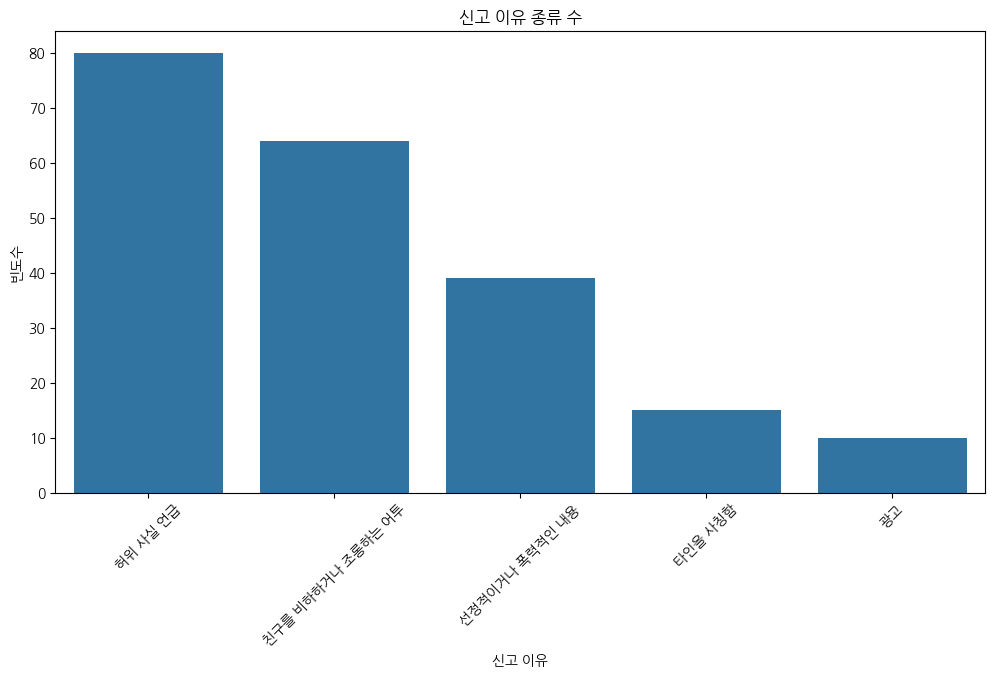

In [126]:
# 신고한 이유 종류 수 시각화
reason_count = df_dict["accounts_timelinereport"].reason.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reason_count.index, y=reason_count.values)
plt.title("신고 이유 종류 수")
plt.xlabel("신고 이유")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 가장 많이 신고 받은 유저는?
top_reported_user = df_dict["accounts_timelinereport"].reported_user_id.value_counts().idxmax()

df_dict["accounts_timelinereport"][df_dict["accounts_timelinereport"].reported_user_id == top_reported_user]

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
155,14175,친구를 비하하거나 조롱하는 어투,2023-05-18 16:20:12,1138757,1343904,67480549
162,14763,친구를 비하하거나 조롱하는 어투,2023-05-19 15:26:49,1138757,1343904,78776644
163,14814,친구를 비하하거나 조롱하는 어투,2023-05-19 17:03:58,1138757,1343904,78776644
164,14815,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:39,1138757,1343904,78776644
165,14816,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:42,1138757,1343904,78776644
166,14817,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:45,1138757,1343904,78776644
167,14818,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:48,1138757,1343904,78776644
168,14819,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:50,1138757,1343904,78776644
169,14820,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:54,1138757,1343904,78776644
170,14821,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:56,1138757,1343904,78776644


무슨 짓을 했길래 그리고 여러번 신고를 했는데 시간 차이가 얼마 나지 않은 것을 보면 또 로그 오류 같음
- 시간 오류를 해결 필요할 듯..

In [130]:
# 신고한 유저와 신고 당한 유저의 몇번 반복 신고를 했는지 확인
report_counts = df_dict["accounts_timelinereport"].groupby(['reported_user_id', 'user_id']).size().reset_index(name='report_count')
report_counts = report_counts.sort_values(by='report_count', ascending=False)

report_counts.head(10)

,reported_user_id,user_id,report_count
51,1138757,1343904,15
29,939196,944838,7
68,1156031,1173995,7
15,885129,914800,6
98,1225963,1291813,6
17,885473,867048,5
85,1187305,1221550,5
49,1131675,1152559,3
115,1272969,1295255,3
90,1207784,1214760,3


In [131]:
df_dict["accounts_timelinereport"][(df_dict["accounts_timelinereport"].reported_user_id == 939196) &(df_dict["accounts_timelinereport"].user_id == 944838)]

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
17,740,허위 사실 언급,2023-05-07 06:14:57,939196,944838,5649541
18,741,허위 사실 언급,2023-05-07 06:15:00,939196,944838,5649541
19,742,허위 사실 언급,2023-05-07 06:15:02,939196,944838,5649541
25,1428,타인을 사칭함,2023-05-07 15:49:21,939196,944838,5849834
26,1429,타인을 사칭함,2023-05-07 15:49:24,939196,944838,5849834
27,1430,타인을 사칭함,2023-05-07 15:49:29,939196,944838,5849834
28,1431,허위 사실 언급,2023-05-07 15:49:31,939196,944838,5849834


몇 초 사이 여러번 신고당한 경우 처리 방법은?
- 같은 이유로 신고 당한 경우 하나의 값만 남기고 제거? 그렇다면 시간은?
- 다른 이유로 신고를 한 경우?
- 몇 초를 기준으로 세울 것인지지

나중에 이걸 airflow로 자동화한다면?
- 데이터를 불러오는 작업
- 데이터 확인
- 데이터 전처리 작업
    - 데이터 결측치 또는 중복치가 일정 이상일 경우 알림
    - 데이터 결측치 또는 중복치가 일정 이상일 경우 제거
